# <center>Livrable 1<br />-<br /> Projet Ademe</center>

La prise de conscience mondiale de la nécessité de réduire la consommation d'énergie et les émissions de gaz à effet de serre s'est accrue depuis les années 90, avec des engagements tels que le protocole de Kyoto et les objectifs ambitieux qui en découlent. Les efforts se concentrent sur le changement de comportement, en mettant l'accent sur l'économie et le recyclage des matériaux, l'amélioration des transports et l'accroissement de l'efficacité énergétique des bâtiments. Cependant, il reste des défis à relever pour imposer le changement aux entreprises et aux particuliers.

## Projet de Mobilité Multimodale Intelligente pour la Gestion de Tournées de Livraison

### Description

L'ADEME (Agence de l'Environnement et de la Maîtrise de l'Énergie) a récemment lancé un appel à manifestation d'intérêt visant à promouvoir la réalisation de démonstrateurs et d'expérimentations de nouvelles solutions de mobilité adaptées aux différents types de territoires, tant pour les personnes que pour les marchandises.

CesiCDP, est déjà bien implantée dans le domaine de la Mobilité Multimodale Intelligente. Avec l'aide de nombreux partenaires, nous avons réalisé plusieurs études sur ce sujet. Les nouvelles technologies de transport, plus économiques et respectueuses de l'environnement, posent néanmoins de nouveaux défis, notamment en termes d'optimisation de la gestion des ressources. La logistique du transport représente un enjeu majeur pour l'avenir, car ses applications sont nombreuses (distribution du courrier, livraison de produits, traitement du réseau routier, ramassage des ordures) et leur impact sur l'environnement peut être significatif.

L'équipe de CesiCDP, composée de 4 personnes, chargée de répondre à l'appel de l'ADEME. L'objectif est de remporter de nouveaux marchés bénéficiant de financements attractifs afin de poursuivre le développement de notre activité.

CesiCDP a décidé de se concentrer sur l'étude de la gestion des tournées de livraison. Le problème algorithmique consiste à calculer une tournée sur un réseau routier reliant un sous-ensemble de villes, tout en minimisant la durée totale de la tournée, de sorte à revenir au point de départ.

L'idée est de proposer une méthode basée sur la Recherche Opérationnelle pour générer une tournée de livraison répondant à ce problème.

Le périmètre du projet doit encore être précisé. Nous avons décrit une version de base du problème, mais afin de le rendre plus réaliste et d'attirer toute l'attention de l'ADEME,il nous faudra ajouter une ou des contraintes supplémentaires. Cela rendra le problème plus complexe à résoudre.

### Version de base

- Choix d'un modèle et d'un code en Python capable de résoudre des instances de taille importante (plusieurs milliers de villes).
- Étude statistique du comportement expérimental de l'algorithme.

### Contraintes supplémentaires

Voici une liste non exhaustive de contraintes qui pourraient être intégrées au périmètre de notre étude.

Certaines contraintes disposent également de versions avancées.

- Fenêtre de temps de livraison pour chaque objet
    - Interdiction de livrer hors de la fenêtre
    - Possibilité d'attendre sur place l'ouverture de la fenêtre temporelle

- Disponibilité simultanée de k camions pour effectuer les livraisons
    - Capacité des camions (2 ou 3 dimensions) et encombrement des objets
    - Certains objets ne peuvent être livrés que par certains camions
- Chaque objet a un point de collecte spécifique
- Le temps de parcours d’une arête varie au cours du temps (ce qui revient à faire varier sa longueur), pour représenter la variation du trafic

### GIT Naming Convention
Nous utilisons la convention suivante : https://www.conventionalcommits.org/en/v1.0.0/

fix(vue) dans le cas où nous corrigeons un bug
docs(UML) dans le cas de modifications mineures du texte ou des livrables
feat(backup) ajout d'une nouvelle fonctionnalité
BREAKING CHANGE:Explications si vous changez un élément critique de l'application
Dans le cas d'une rupture composée d'un correctif ou d'un élément structurel, vous pouvez ajouter une explication.
fix !(vue) : Commentaire

# <center>Partie 1 : Modélisation<center>

Notre projet se rapproche donc de celui du Voyageur de Commerce.
On veut prouver que le projet ADEME est NP-Difficile et par extension NP-Complet.

On cherche donc à prouver que le Voyageur de Commerce est NP-Complet car si ADEME est au moins tout aussi difficile que celui du voyageur et qu'il est NP-Complet alors notre projet est lui aussi NP-Complet.

Rappelons la définition d'un problème NP-Complet :
Un problème est NP-Complet si :
    - Il est contenu dans NP
    - Il est contenu dans NP-Difficile



### Variables de Decisions

#### Variables :
$ x_{ij} $ : variable d'état booléene symbolisant si l'arête est dans la solution.

#### Variables Constantes :
$ c_{ij} $ : coût fixe de l'arête

### Contraintes :
- Passer une seule et unique fois par chaque ville.
- Revenir au depôt, au point de départ.
- En arrivant sur un nœud, on repart systématiquement de celui-ci.
- On ne peut pas faire de boucle et revenir sur son propre nœud.
2


### Fonction Objectif :
On cherche à minimiser le coût de transport lié aux arêtes.

$ minF = \sum_{i\in N} \sum_{j\in N} x_{ij} \times c_{ij} $<br>
$ \sum_{x_oi}x_{0i} = 1  $<br>
$ \sum_{x_jo}x_{j0} = 1  $<br>
$ \sum_{x_ii}x_{ii}= 0  $<br>
$ \sum_{i\in N}x_{ij} = 1 \forall i\in N  $<br>
$ \sum_{i\in N}x_{ij} = 1 \forall j\in N  $<br>
$ t_i + c_{ij} - R(1-x_{ij}) < t_j  $<br>


### Complexité du Problème

Rappel : Un problème est NP Complet si et seulement s'il fait partis de NP et peut être réduit à un problème similaire qui est dit NP Complet. Alors notre problème est dit au moins aussi complet que celui pour lequel il a été réduit. Il est donc lui aussi NP Complet.

#### Demonstration de la NP Complétude de notre problème :

Démontrons tout d'abord que notre problème est dans NP :

Afin de démontrer son appartenance à NP, nous devons verifier si un certificat peut être vérifié en temps polynomial.

Dans notre problème nous possédons :
- Une suite de sommets formant un circuit. Ce circuit forme une boucle partant d'un point de départ passant par chaque sommet le plus proche et arrivant à ce même point. -> Cela peut se vérifier en temps linéaire $ O_n $
- L'on passe qu'une seule et unique fois par chaque sommet -> Cela peut se vérifier en temps linéaire $ O_n $
- Il faut que la somme du poids des arêtes parcourues donc le coup du circuit soit inférieur à $ k $ -> Cela peut se vérifier en temps constant $ O_1 $

L'on possède donc un problème possédant les caractéristiques suivantes, nous avons donc vérifié que celui-ci est en temps linéaire.
L'on peut affirmer qu'il est verifiable en temps polynomial.
Notre problème appartient donc à NP

Passons à la démonstration afin de prouver son appartenance à NP Complet :

Notre problème peut être réduit à celui du voyageur de commerce que l'on sait NP Difficile.
Notre problème d'optimisation est donc au moins aussi difficile que celui du voyageur de commerce.
Notre problème étant dans NP et NP Difficile, il est au moins aussi difficile que le voyageur du commerce, et donc également NP Complet.

# <center>Partie 2 : Implémentation et exploitation<center>

## I/ Implémentation
<br></br>
Une fois la modélisation de notre problème établie et les métaheuristiques choisies, nous pouvons passer aux différentes implémentations de nos algorithmes. Afin d'élargir notre espace de recherche, nous avons décidé d'implémenter différents algorithmes, tels que :
- l'algorithme de colonies de fourmis
- l'algorithme du recuit simulé
- l'algorithme génétique

Cela nous permettra donc de comparer les différents algorithmes et de voir lesquels sont les plus efficaces.


Chaque algorithme possède une version capable de déterminer un chemin optimal pour un graphe complet, ainsi qu'une autre version capable de réaliser la même tâche pour un graphe quelconque.

Nous allons maintenant tester les différents algorithmes. Pour ce faire, 3 instances de test sont mise en place ci-dessous :

In [15]:
#imports common libs
import numpy as np
import random
import copy
import matplotlib.pyplot as plt
import time
import math
import os
import csv
import datetime
import os
import time
from collections import defaultdict
import psutil
from tqdm import tqdm
from sklearn.cluster import KMeans
from scipy.spatial import distance_matrix

In [17]:
from generate import generate
from complete_graphs.graph import Graph

ModuleNotFoundError: No module named 'graph'

In [4]:
# Instance avec 100 villes
generate(X=100,Y=100,n=100)

array([[ 0.        , 23.71963765, 27.39616738, ..., 32.1144326 ,
        31.95296574, 20.20170515],
       [34.67531831,  0.        , 31.18273904, ..., 16.83025633,
        29.88952794, 14.41661868],
       [27.39616738, 28.16726537,  0.        , ...,  7.75363689,
        20.46241315, 33.48194118],
       ...,
       [30.8774155 , 16.83025633,  8.06426462, ...,  0.        ,
        14.8251024 , 29.40009286],
       [48.58283918, 29.88952794, 20.46241315, ..., 21.84659578,
         0.        , 59.44809615],
       [20.20170515, 24.26636378, 26.16094598, ..., 29.82372532,
        53.69926927,  0.        ]])

### 1. Algorithmes avec graphe complet
<br></br>
##### Algorithme de colonies de fourmis

In [7]:
# Code de l'aco

num_ants = 20
alpha = 1
beta = 2
evaporation = 0.5
iterations = 100
nb_trucks = 2

def read_coordinates():
    coordinates = []
    with open('vendor/coords/list.txt', 'r') as file:
        for line in file:
            parts = line.strip().split()
            index = int(parts[0])
            x = float(parts[1])
            y = float(parts[2])
            coordinates.append((x, y))
    return coordinates


def read_distance_matrix(file_path):
    distance_matrix = []
    with open(file_path, 'r') as file:
        for line in file:
            distances = [float(distance) for distance in line.strip().split()]
            distance_matrix.append(distances)
    return np.array(distance_matrix)
distance_matrix = read_distance_matrix('vendor/coords/distances.txt')

def read_cost_matrix():
    cost_matrix = []
    with open('vendor/coords/matrix.txt', 'r') as file:
        for line in file:
            row = [float(value) if value != 'nan' else np.nan for value in line.strip().split()]
            cost_matrix.append(row)
    return np.array(cost_matrix)

def choose_next_city(current_city, unvisited_cities, pheromone_matrix, distance_matrix, alpha, beta):
    probabilities = []
    total = 0

    for city in unvisited_cities:
        pheromone = pheromone_matrix[current_city][city] ** alpha
        distance = distance_matrix[current_city][city] ** beta

        # Avoid division by zero or NaN values
        if distance == 0 or np.isnan(distance):
            probabilities.append(0)
        else:
            probabilities.append(pheromone / distance)
            total += pheromone / distance

    if total == 0:
        # If total is still zero, choose a random next city
        return np.random.choice(unvisited_cities)

    probabilities = [p / total for p in probabilities]
    next_city_index = np.random.choice(range(len(unvisited_cities)), p=probabilities)
    return unvisited_cities[next_city_index]
def ant_colony(coordinates, distance_matrix, num_ants, alpha, beta, evaporation, nb_trucks):
    num_cities = len(coordinates)

    if nb_trucks == 1:
        best_path = None
        best_cost = float('inf')
        pheromone_matrix = np.ones((num_cities, num_cities)) * evaporation

        # Wrapping range with tqdm to create a progress bar
        for _ in tqdm(range(iterations), desc="Running Ant Colony Optimization"):
            paths = []
            costs = []

            for _ in range(num_ants):
                current_city = np.random.randint(0, num_cities)
                unvisited_cities = list(range(num_cities))
                unvisited_cities.remove(current_city)
                path = [current_city]
                cost = 0

                while unvisited_cities:
                    next_city = choose_next_city(current_city, unvisited_cities, pheromone_matrix,
                                                 distance_matrix, alpha, beta)
                    path.append(next_city)
                    cost += distance_matrix[current_city][next_city]
                    unvisited_cities.remove(next_city)
                    current_city = next_city

                path.append(path[0])
                cost += distance_matrix[path[-2]][path[-1]]

                paths.append(path)
                costs.append(cost)

                if cost < best_cost:
                    best_path = path
                    best_cost = cost

            pheromone_matrix *= (1 - evaporation)

            for i in range(num_ants):
                for j in range(num_cities):
                    pheromone_matrix[paths[i][j]][paths[i][j+1]] += 1 / costs[i]

        return best_path, best_cost
    else:
        # Cas pour plusieurs camions avec clustering
        distance_matrix = read_distance_matrix('vendor/coords/distances.txt')

        # Création des clusters
        clusters = [[] for _ in range(nb_trucks)]
        num_cities = len(coordinates)

        assigned = set()  # Villes déjà assignées à un cluster

        for i in range(num_cities):
            if i not in assigned:
                nearest_city = np.argmin(distance_matrix[i])  # Indice de la ville la plus proche
                cluster_id = len(assigned) % nb_trucks  # Identifiant du cluster
                clusters[cluster_id].append(i)  # Ajouter la ville au cluster
                assigned.add(i)  # Marquer la ville comme assignée
                assigned.add(nearest_city)  # Marquer la ville la plus proche comme assignée

        # Storing paths for all trucks
        all_truck_paths = []
        total_cost = 0

        # Running ant colony optimization for each cluster
        for cluster_id in range(nb_trucks):
            cluster_coordinates = [coordinates[i] for i in clusters[cluster_id]]
            cluster_distance_matrix = distance_matrix[clusters[cluster_id]][:, clusters[cluster_id]]

            # Running ant colony optimization on the cluster
            best_path, best_cost = ant_colony(cluster_coordinates, cluster_distance_matrix, num_ants, alpha, beta,
                                              evaporation, nb_trucks=1)

            # Adding paths and costs for each truck
            all_truck_paths.append(best_path)
            total_cost += best_cost

        # Return all the paths and the total cost
        return all_truck_paths, total_cost
def running(perf_iterations:int=1):
    # Plot the CPU usage graph
    cpu_percentages = []
    memory_usages = []
    timestamps = []

    # Read coordinates and distance matrix
    coordinates = read_coordinates()
    distance_matrix = read_cost_matrix()
    num_cities = len(coordinates)

    writer = None

    if perf_iterations > 1:
        filename = 'vendor/benchmarks/ant_complete/'
        os.makedirs(os.path.dirname(filename), exist_ok=True)  # create folder if it doesn't exist
        benchfile = open(f"{filename}/{datetime.datetime.now().strftime('%d-%m-%Y_%H-%M-%S')}.csv", mode='w',newline='')# open file

        writer = csv.writer(benchfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)  # create csv writer
        writer.writerow(["iteration", "runtime (ms)", "CPU time (ms)", "memory (mb)", "nb_nodes", "nb_edges", "cost",
                         "path"])  # write header

    for i in range(perf_iterations):
        # Start time and resource usage
        start_time = time.time()
        start_cpu_time = psutil.Process().cpu_times().user
        start_memory_usage = psutil.Process().memory_info().rss / 1024 / 1024

        # Run the ant colony optimization algorithm
        if nb_trucks == 1:
            best_path, best_cost = ant_colony(coordinates, distance_matrix, num_ants, alpha, beta, evaporation, nb_trucks)
        else:
            all_truck_paths, total_cost = ant_colony(coordinates, distance_matrix, num_ants, alpha, beta, evaporation,
                                                     nb_trucks)
        # End time and resource usage
        end_cpu_time = psutil.Process().cpu_times().user
        end_memory_usage = psutil.Process().memory_info().rss / 1024 / 1024
        end_time = time.time()

        # Calculate execution time and resource usage
        execution_time = end_time - start_time
        cpu_time = end_cpu_time - start_cpu_time
        memory_usage = end_memory_usage - start_memory_usage

        if perf_iterations > 1:
            if nb_trucks == 1:
                writer.writerow([i, execution_time * 1000, cpu_time * 1000, memory_usage, num_cities, num_cities ** 2,
                                 best_cost, best_path])
            else :
                writer.writerow([i, execution_time * 1000, cpu_time * 1000, memory_usage, num_cities, num_cities ** 2,
                             total_cost, all_truck_paths])




    # Print results
    if nb_trucks == 1:
        print("Best path:", best_path)
        print("Best cost:", best_cost)
        np.savetxt('vendor/Coords_ant/road.txt', best_path, fmt='%.0f')
    else:
        print("Best paths:", all_truck_paths)
        print("Total cost:", total_cost)
        with open('vendor/Coords_ant/composite_road.txt', 'w') as file:
            for i, truck_path in enumerate(all_truck_paths):
                for city in truck_path:
                    file.write(str(city) + '\n')
                if i < len(all_truck_paths) - 1:
                    file.write('-----' + '\n')
    print("Execution time:", execution_time, "seconds")
    print("CPU time:", cpu_time, "seconds")
    print("Memory usage:", memory_usage, "MB")


    # Plot CPU and memory usage in real-time
    for i in range(int(execution_time) + 1):
        cpu_percentages.append(psutil.cpu_percent())
        memory_usages.append(psutil.Process().memory_info().rss / 1024 / 1024)
        timestamps.append(i)

        # Plot CPU usage graph
        plt.subplot(211)
        plt.plot(timestamps, cpu_percentages, color='blue')
        plt.xlabel('Time (seconds)')
        plt.ylabel('CPU Usage (%)')
        plt.title('CPU Usage')

        # Plot memory usage graph
        plt.subplot(212)
        plt.plot(timestamps, memory_usages, color='red')
        plt.xlabel('Time (seconds)')
        plt.ylabel('Memory Usage (MB)')
        plt.title('Memory Usage')
        plt.draw()
    plt.show()

def calculate_results():
    # Path of the file containing the list of cities
    cities_file_path = 'vendor/Coords_ant/road.txt'
    composite_cities_file_path = 'vendor/Coords_ant/composite_road.txt'
    # Path of the file containing the distance matrix
    distances_file_path = 'vendor/coords/distances.txt'
    times_file_path = 'vendor/coords/times.txt'
    gas_file_path = 'vendor/coords/gas.txt'
    gas_cost_file_path = 'vendor/coords/gas_cost.txt'
    human_cost_file_path = 'vendor/coords/human_cost.txt'

    # Read the list of cities from the file
    with open(cities_file_path, 'r') as cities_file:
        cities = [int(line.strip()) for line in cities_file]

    # Read the distance matrix from the file
    with open(distances_file_path, 'r') as distances_file:
        distance_lines = [line.strip().split() for line in distances_file]
        distance_matrix = [[float(distance) for distance in line] for line in distance_lines]

    # Read the time matrix from the file
    with open(times_file_path, 'r') as times_file:
        time_lines = [line.strip().split() for line in times_file]
        time_matrix = [[float(time) for time in line] for line in time_lines]

    # Read the gas consumption matrix from the file
    with open(gas_file_path, 'r') as gas_file:
        gas_lines = [line.strip().split() for line in gas_file]
        gas_matrix = [[float(gas) for gas in line] for line in gas_lines]

    # Read the gas cost matrix from the file
    with open(gas_cost_file_path, 'r') as gas_cost_file:
        gas_cost_lines = [line.strip().split() for line in gas_cost_file]
        gas_cost_matrix = [[float(gas_cost) for gas_cost in line] for line in gas_cost_lines]

    # Read the human cost matrix from the file
    with open(human_cost_file_path, 'r') as human_cost_file:
        human_cost_lines = [line.strip().split() for line in human_cost_file]
        human_cost_matrix = [[float(human) for human in line] for line in human_cost_lines]

    if nb_trucks == 1:
        # Calculate the total distance of the circuit
        total_distance = 0
        total_time = 0
        total_gas = 0
        total_gas_cost = 0
        total_human_cost = 0
        num_cities = len(cities)
        for i in range(num_cities - 1):
            start_city = cities[i]
            end_city = cities[i + 1]
            distance = distance_matrix[start_city][end_city]
            time = time_matrix[start_city][end_city]
            gas = gas_matrix[start_city][end_city]
            gas_cost = gas_cost_matrix[start_city][end_city]
            human_cost = human_cost_matrix[start_city][end_city]
            total_distance += distance
            total_time += time
            total_gas += gas
            total_gas_cost += gas_cost
            total_human_cost += human_cost
            hours = int(total_time)  # Integer part of hours
            difference = total_time - hours  # Difference between the approximation and the integer part
            minutes = int(difference * 60)  # Conversion of the difference to minutes

        print("Distance:", total_distance, "km")
        print("Time:", f"{hours} hours {minutes} minutes")
        print("Gas consumption:", total_gas, "L")
        print("Gas cost:", total_gas_cost, "€")
        print("Human cost:", total_human_cost, "€")
    else:
        # Cas pour plusieurs camions
        with open(composite_cities_file_path, 'r') as composite_cities_file:
            lines = composite_cities_file.readlines()
            truck_paths = []  # Liste pour stocker les chemins de chaque camion
            current_path = []  # Liste temporaire pour stocker le chemin courant
            for line in lines:
                if line.strip() != '-----':
                    current_path.append(int(line.strip()))
                else:
                    truck_paths.append(current_path)
                    current_path = []
            if current_path:  # Ajouter le dernier chemin s'il n'est pas vide
                truck_paths.append(current_path)

        # Calculer la distance totale du circuit pour chaque camion
        for truck_index, cities in enumerate(truck_paths):
            total_distance = 0
            total_time = 0
            total_gas = 0
            total_gas_cost = 0
            total_human_cost = 0
            num_cities = len(cities)
            for i in range(num_cities - 1):
                start_city = cities[i]
                end_city = cities[i + 1]
                distance = distance_matrix[start_city][end_city]
                time = time_matrix[start_city][end_city]
                gas = gas_matrix[start_city][end_city]
                gas_cost = gas_cost_matrix[start_city][end_city]
                human_cost = human_cost_matrix[start_city][end_city]
                total_distance += distance
                total_time += time
                total_gas += gas
                total_gas_cost += gas_cost
                total_human_cost += human_cost

            hours = int(total_time)  # Partie entière des heures
            difference = total_time - hours  # Différence entre l'approximation et la partie entière
            minutes = int(difference * 60)  # Conversion de la différence en minutes

            print(f"Truck {truck_index + 1}:")
            print("  Distance:", total_distance, "km")
            print("  Time:", f"{hours} hours {minutes} minutes")
            print("  Gas consumption:", total_gas, "L")
            print("  Gas cost:", total_gas_cost, "€")
            print("  Human cost:", total_human_cost, "€")
            print()

Running Ant Colony Optimization: 100%|██████████| 100/100 [00:04<00:00, 24.10it/s]


Best paths: [[41, 18, 17, 13, 26, 43, 23, 30, 33, 20, 47, 4, 31, 21, 45, 40, 6, 46, 7, 28, 22, 38, 0, 48, 16, 24, 5, 12, 39, 11, 8, 1, 14, 9, 36, 3, 27, 32, 42, 19, 44, 15, 34, 10, 29, 49, 37, 2, 25, 35, 41], [36, 47, 13, 45, 41, 9, 22, 44, 12, 8, 23, 46, 28, 2, 6, 39, 31, 16, 21, 30, 5, 27, 43, 34, 48, 10, 7, 17, 3, 0, 40, 20, 49, 19, 33, 37, 38, 18, 4, 24, 42, 15, 1, 29, 35, 25, 11, 26, 14, 32, 36]]
Total cost: 1216.9099999999999
Execution time: 8.365692377090454 seconds
CPU time: 8.5625 seconds
Memory usage: 0.08203125 MB


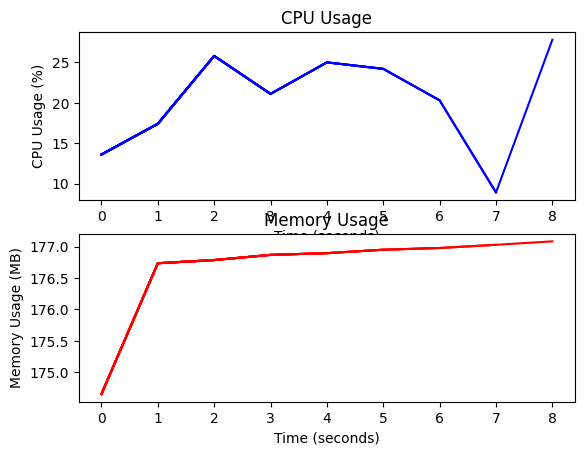

Truck 1:
  Distance: 2416.6600000000003 km
  Time: 41 hours 33 minutes
  Gas consumption: 1077.8200000000004 L
  Gas cost: 1832.3 €
  Human cost: 373.9999999999999 €

Truck 2:
  Distance: 2369.5400000000004 km
  Time: 41 hours 54 minutes
  Gas consumption: 1054.6600000000003 L
  Gas cost: 1792.9700000000005 €
  Human cost: 376.92 €



In [8]:
# Code avec paramètres pour lancer l'aco
running()
calculate_results()

##### Algorithme du recuit simulé

In [ ]:
# Code du recuit
import csv
import datetime
import os

import numpy as np
import matplotlib.pyplot as plt
import random
import copy
import time
import math
import psutil
from sklearn.cluster import KMeans

# Paramètres de contrôle
temp_init = 10000
cooling = 0.995
temp_min = 0.0001
nb_trucks = 3
reheat_threshold = 0.001
reheat_value = 300
max_reheat_count = 6

# Chemin du fichier contenant la matrice de coûts
cost_matrix_file_path = 'vendor/coords/matrix.txt'


def read_coordinates():
    coordinates = []
    with open('vendor/coords/list.txt', 'r') as file:
        for line in file:
            parts = line.strip().split()
            x = float(parts[1])
            y = float(parts[2])
            coordinates.append((x, y))
    return coordinates


def read_cost_matrix(file_path):
    cost_matrix = []
    with open(file_path, 'r') as file:
        for line in file:
            row = [float(value) if value != 'nan' else np.nan for value in line.strip().split()]
            cost_matrix.append(row)
    return np.array(cost_matrix)


def generate_random_tour(cost_matrix):
    city_count = len(cost_matrix)
    return random.sample(range(city_count), city_count)


def distance(tour, cities):
    distance = 0
    for i in range(1, len(tour)):
        distance += np.linalg.norm(np.array(cities[tour[i - 1]]) - np.array(cities[tour[i]]))
    distance += np.linalg.norm(np.array(cities[tour[-1]]) - np.array(cities[0]))
    return distance


def split_tour(tour, num_trucks, cities):
    city_count = len(tour)
    city_coordinates = [cities[i] for i in tour]

    kmeans = KMeans(n_clusters=num_trucks, n_init=10, random_state=0).fit(city_coordinates)
    labels = kmeans.labels_

    sub_tours = [[] for _ in range(num_trucks)]
    for i, label in enumerate(labels):
        sub_tours[label].append(tour[i])

    for i in range(num_trucks):
        if sub_tours[i][0] != 0:
            sub_tours[i].insert(0, 0)
        if sub_tours[i][-1] != 0:
            sub_tours[i].append(0)

    return sub_tours


def simulated_annealing(cost_matrix, temp_init, cooling, temp_min, reheat_threshold, reheat_value, max_reheat_count):
    start_time = time.time()
    cities = read_coordinates()
    current_tour = generate_random_tour(cost_matrix)
    current_distance = distance(current_tour, cities)
    best_tour = current_tour
    best_distance = current_distance
    temperature = temp_init
    nb_iterations = 0
    reheat_count = 0

    while temperature > temp_min:
        nb_iterations += 1

        new_tour = copy.copy(current_tour)
        swap_indices = random.sample(range(1, len(new_tour)), 2)
        new_tour[swap_indices[0]], new_tour[swap_indices[1]] = new_tour[swap_indices[1]], new_tour[swap_indices[0]]

        new_distance = distance(new_tour, cities)
        delta_distance = new_distance - current_distance

        if delta_distance < 0 or random.random() < math.exp(-delta_distance / temperature):
            current_tour = new_tour
            current_distance = new_distance

        if current_distance < best_distance:
            best_tour = current_tour
            best_distance = current_distance

        temperature *= cooling

        if temperature < reheat_threshold and reheat_count < max_reheat_count:
            temperature += reheat_value
            reheat_count += 1

    sub_tours = split_tour(best_tour, nb_trucks, cities)

    total_distance = 0
    for i, sub_tour in enumerate(sub_tours):
        sub_tour_distance = distance(sub_tour, cities)
        print("Tour {}: Length {}, Route: {}".format(i + 1, sub_tour_distance, sub_tour))
        total_distance += sub_tour_distance

    print("Total distance: {}".format(total_distance))
    print("Execution time in seconds: ", time.time() - start_time)
    print("Number of iterations: {}".format(nb_iterations))

    # Modification ici: écrire les sous-tours dans le fichier composite_road.txt
    with open('vendor/coords_rec/composite_road.txt', 'w') as file:
        for i, sub_tour in enumerate(sub_tours):
            sub_tour_distance = distance(sub_tour, cities)
            print("Tour {}: Length {}, Route: {}".format(i + 1, sub_tour_distance, sub_tour))
            # Écriture du sous-tour
            for city_index in sub_tour:
                file.write(str(city_index) + '\n')
            # Écriture de la démarcation (série de tirets) entre les sous-tours
            if i < len(sub_tours) - 1:
                file.write('-----\n')
            total_distance += sub_tour_distance

    with open('vendor/coords_rec/road.txt', 'w') as file:
        for city_index in best_tour:
            file.write(str(city_index) + '\n')
    return best_tour, best_distance


def calculate_results(best_tour):
    cities_file_path = 'vendor/Coords_rec/road.txt'
    distances_file_path = 'vendor/coords/distances.txt'
    times_file_path = 'vendor/coords/times.txt'
    gas_file_path = 'vendor/coords/gas.txt'
    gas_cost_file_path = 'vendor/coords/gas_cost.txt'
    human_cost_file_path = 'vendor/coords/human_cost.txt'

    with open(cities_file_path, 'r') as cities_file:
        cities = [int(line.strip()) for line in cities_file]

    with open(distances_file_path, 'r') as distances_file:
        distance_lines = [line.strip().split() for line in distances_file]
        distance_matrix = [[float(distance) for distance in line] for line in distance_lines]

    with open(times_file_path, 'r') as times_file:
        time_lines = [line.strip().split() for line in times_file]
        time_matrix = [[float(time) for time in line] for line in time_lines]

    with open(gas_file_path, 'r') as gas_file:
        gas_lines = [line.strip().split() for line in gas_file]
        gas_matrix = [[float(gas) for gas in line] for line in gas_lines]

    with open(gas_cost_file_path, 'r') as gas_cost_file:
        gas_cost_lines = [line.strip().split() for line in gas_cost_file]
        gas_cost_matrix = [[float(gas_cost) for gas_cost in line] for line in gas_cost_lines]

    with open(human_cost_file_path, 'r') as human_cost_file:
        human_cost_lines = [line.strip().split() for line in human_cost_file]
        human_cost_matrix = [[float(human) for human in line] for line in human_cost_lines]

    # Lire la matrice des distances
    with open('vendor/coords/distances.txt', 'r') as distances_file:
        distance_lines = [line.strip().split() for line in distances_file]
        distance_matrix = [[float(distance) for distance in line] for line in distance_lines]

    total_distance = 0
    total_time = 0
    total_gas = 0
    total_gas_cost = 0
    total_human_cost = 0
    num_cities = len(cities) - 1

    for i in range(num_cities - 1):
        start_city = cities[i]
        end_city = cities[i + 1]
        distance = distance_matrix[start_city][end_city]
        time = time_matrix[start_city][end_city]
        gas = gas_matrix[start_city][end_city]
        gas_cost = gas_cost_matrix[start_city][end_city]
        human_cost = human_cost_matrix[start_city][end_city]
        total_distance += distance
        total_time += time
        total_gas += gas
        total_gas_cost += gas_cost
        total_human_cost += human_cost

    hours = int(total_time)
    minutes = int((total_time - hours) * 60)

    print("Distance:", total_distance, "km")
    print("Time:", f"{hours} hours {minutes} minutes")
    print("Gas consumption:", total_gas, "L")
    print("Gas cost:", total_gas_cost, "€")
    print("Human cost:", total_human_cost, "€")



perf_iterations=1

writer = None
if perf_iterations > 1:
    filename = 'vendor/benchmarks/rec_complete/'
    os.makedirs(os.path.dirname(filename), exist_ok=True)  # create folder if it doesn't exist
    benchfile = open(f"{filename}/{datetime.datetime.now().strftime('%d-%m-%Y_%H-%M-%S')}.csv", mode='w',newline='')# open file

    writer = csv.writer(benchfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)  # create csv writer
    writer.writerow(["iteration", "runtime (ms)", "CPU time (ms)", "memory (mb)", "nb_nodes", "nb_edges", "cost",
                     "path"])  # write header

for i in range(perf_iterations):
    # Start time and resource usage
    start_time = time.time()
    start_cpu_time = psutil.Process().cpu_times().user
    start_memory_usage = psutil.Process().memory_info().rss / 1024 / 1024

    # Lancement de l'algorithme de recuit simulé
    best_tour, best_distance = simulated_annealing(
        read_cost_matrix(cost_matrix_file_path), temp_init, cooling, temp_min, reheat_threshold, reheat_value,
        max_reheat_count)

    # End time and resource usage
    end_cpu_time = psutil.Process().cpu_times().user
    end_memory_usage = psutil.Process().memory_info().rss / 1024 / 1024
    end_time = time.time()

    # Calculate execution time and resource usage
    execution_time = end_time - start_time
    cpu_time = end_cpu_time - start_cpu_time
    memory_usage = end_memory_usage - start_memory_usage

    num_cities = len(best_tour)

    if perf_iterations > 1:
        writer.writerow([i, execution_time * 1000, cpu_time * 1000, memory_usage, num_cities, num_cities ** 2, best_distance, best_tour])

# Calcul et affichage des résultats
calculate_results(best_tour)


In [ ]:
# Code avec paramètres pour lancer le recuit

##### Algorithme génétique

In [9]:
# Code du génétique
def genetic(nb_generations, nb_solutions, nb_kept_solutions, mutation_rate, start_node,graph=None):
    # graph.node_and_edges_from_adjacency_matrix([[0, 0, 0, 0, 0, 0, 247, 0, 375, 0], [0, 0, 0, 4, 0, 0, 140, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 323, 457], [0, 4, 0, 0, 0, 0, 0, 287, 0, 0], [0, 0, 0, 0, 0, 0, 334, 0, 0, 116], [0, 0, 0, 0, 0, 0, 552, 0, 0, 485], [247, 140, 0, 0, 334, 552, 0, 0, 0, 0], [0, 0, 0, 287, 0, 0, 0, 0, 373, 0], [375, 0, 323, 0, 0, 0, 0, 373, 0, 0], [0, 0, 457, 0, 116, 485, 0, 0, 0, 0]])
    if graph is None:
        graph = Graph()
        graph.generate_random_graph(100)
    # graph.plot_graph()

    generation = []
    solutions = []

    start_time = time.time()

    for _ in range(nb_generations):
        print("generation",_+1)
        if len(solutions) == nb_kept_solutions:
            solutions.extend(
                random_solution(graph, start_node)
                for __ in range(nb_solutions - nb_kept_solutions)
            )
        else:
            solutions.extend(
                random_solution(graph, start_node)
                for __ in range(nb_solutions)
            )

        generation = fitness(graph, solutions, generation)
        if _ == nb_generations-1:
            print('best found path before crossover and mutation :', generation[0])
        # print('fitness done')

        best_solutions = [generation[0][1]]
        start = time.time()
        best_solutions.extend(
            cross_over(
                generation[i][1], generation[i + 1][1], graph, start_node
            )
            for i in range(nb_kept_solutions - 1)
        )
        print('crossover time :',time.time() - start, 's')
        # print('crossover done')

        start = time.time()
        for i in range(len(best_solutions)):
            best_solutions[i] = mutation(best_solutions[i], mutation_rate, graph)

        print('all mutation time :', time.time() - start, 's')
        solutions = best_solutions
        generation = []

    best_found_path = fitness(graph,solutions, generation)[0]
    print('best found path :',best_found_path)
    print(len(best_found_path[1]))

    print("best path found in", (time.time() - start_time) * 1000, "ms")

    return best_found_path

def fitness(graph, solutions, gen):
    for i in solutions:
        path_cost = sum(
            graph.get_edge(i[j], i[(j + 1)]).weight for j in range(len(i) - 1)
        )
        gen.append((path_cost, i))
    gen= sorted(gen, key=lambda x: x[0])
    return gen

def random_solution(graph, start_node):

    path = []
    nodes_list = list(graph.nodes.keys())
    path.append(start_node)
    nodes_list.pop(nodes_list.index(start_node))
    next_node = random.choice(graph.nodes[start_node].neighbors)
    while nodes_list or path[0] != path[-1]:
        path.append(next_node)
        if next_node in nodes_list:
            nodes_list.pop(nodes_list.index(next_node))

        next_node = random.choice(graph.nodes[next_node].neighbors)

    return path



def cross_over(parent_1,parent_2,graph,start_node):
    def create_indices_dict(parent):
        indices_dict = defaultdict(list)
        for index, node in enumerate(parent):
            indices_dict[node].append(index)
        return indices_dict

    new_path = [start_node]
    nodes_list = list(graph.nodes.keys())
    nodes_list.remove(start_node)

    indices_dict_parent_1 = create_indices_dict(parent_1)
    indices_dict_parent_2 = create_indices_dict(parent_2)

    current_node = start_node
    while nodes_list or new_path[0] != new_path[-1]:
        # indices = [index for index, node in enumerate(parent_1) if node == current_node]
        indices = indices_dict_parent_1.get(current_node, [])
        chosen_index_parent_1 = random.choice(indices)
        next_node_parent_1 = parent_1[chosen_index_parent_1 + 1] if chosen_index_parent_1 < len(parent_1) - 1 else None

        # indices = [index for index, node in enumerate(parent_2) if node == current_node]
        indices = indices_dict_parent_2.get(current_node, [])
        chosen_index_parent_2 = random.choice(indices)
        next_node_parent_2 = parent_2[chosen_index_parent_2 + 1] if chosen_index_parent_2 < len(parent_2) - 1 else None

        # Choose randomly between next_node_parent_1 and next_node_parent_2
        next_node = random.choice([next_node_parent_1, next_node_parent_2])
        if not next_node:
            if valid_next_nodes := [
                node
                for node in graph.nodes[current_node].neighbors
                if node in nodes_list
            ]:
                next_node = random.choice(valid_next_nodes)
            else:
                next_node = random.choice(graph.nodes[current_node].neighbors)

        new_path.append(next_node)
        if next_node in nodes_list:
            nodes_list.remove(next_node)
        current_node = next_node
    return new_path


def mutation(sol, rate, graph):
    def is_valid_path(path, i1, i2, graph):
        if graph.get_edge(path[i1],path[i1+1]) and graph.get_edge(path[i1], path[i1 - 1]) and graph.get_edge(path[i2], path[i2 + 1]) and graph.get_edge(path[i2], path[i2 - 1]):
            return True
        # return all(graph.get_edge(path[i], path[i + 1]) for i in range(len(path) - 1))

    if random.random() <= rate:
        for _ in range(len(sol)*10):  # Limit to a certain number of tries
            # Choose two node indices at random from the solution
            idx1, idx2 = random.sample(range(1, len(sol)-1), 2)

            if sol[idx1] == sol[idx2]:
                continue

            # Swap the nodes at these indices
            mutated_sol = list(sol)
            mutated_sol[idx1], mutated_sol[idx2] = sol[idx2], sol[idx1]

            # Verify if the mutated solution is still a valid path
            if is_valid_path(mutated_sol, idx1, idx2, graph):
                return mutated_sol
    # If no valid mutation was found, return the original solution
    return sol

In [10]:
# Code avec paramètres pour lancer le génétique

genetic_graph = Graph()
genetic_graph.graph_from_matrix_file('vendor/Coords/matrix.txt')

nb_gen = 50
nb_sol = 1000
nb_kept_sol = 100
mut_rate = .25
start_n = '0'


genetic(graph=genetic_graph,nb_generations=nb_gen, nb_solutions=nb_sol, nb_kept_solutions=nb_kept_sol, mutation_rate=mut_rate, start_node=start_n)

generation 1
crossover time : 0.0877985954284668 s
all mutation time : 0.0 s
generation 2
crossover time : 0.0937647819519043 s
all mutation time : 0.0 s
generation 3
crossover time : 0.09777498245239258 s
all mutation time : 0.0009989738464355469 s
generation 4
crossover time : 0.1719226837158203 s
all mutation time : 0.0001437664031982422 s
generation 5
crossover time : 0.09156179428100586 s
all mutation time : 0.0 s
generation 6
crossover time : 0.09188461303710938 s
all mutation time : 0.0 s
generation 7
crossover time : 0.0868384838104248 s
all mutation time : 0.0010004043579101562 s
generation 8
crossover time : 0.08830428123474121 s
all mutation time : 0.0 s
generation 9
crossover time : 0.08426332473754883 s
all mutation time : 0.0 s
generation 10
crossover time : 0.09330224990844727 s
all mutation time : 0.0 s
generation 11
crossover time : 0.08634114265441895 s
all mutation time : 0.0 s
generation 12
crossover time : 0.0848684310913086 s
all mutation time : 0.0 s
generation 1

(9509.740000000002,
 ['0',
  '52',
  '47',
  '20',
  '89',
  '6',
  '30',
  '10',
  '71',
  '61',
  '90',
  '49',
  '75',
  '60',
  '26',
  '76',
  '11',
  '72',
  '11',
  '80',
  '76',
  '12',
  '15',
  '26',
  '67',
  '69',
  '56',
  '37',
  '77',
  '16',
  '40',
  '10',
  '27',
  '86',
  '77',
  '2',
  '80',
  '39',
  '79',
  '64',
  '77',
  '91',
  '15',
  '97',
  '54',
  '21',
  '34',
  '65',
  '36',
  '73',
  '66',
  '51',
  '19',
  '47',
  '61',
  '48',
  '94',
  '84',
  '77',
  '69',
  '65',
  '25',
  '77',
  '56',
  '93',
  '83',
  '45',
  '39',
  '72',
  '10',
  '54',
  '99',
  '10',
  '97',
  '83',
  '40',
  '0',
  '67',
  '23',
  '43',
  '97',
  '64',
  '24',
  '88',
  '17',
  '27',
  '16',
  '47',
  '77',
  '66',
  '41',
  '27',
  '70',
  '36',
  '50',
  '85',
  '62',
  '9',
  '65',
  '63',
  '99',
  '78',
  '50',
  '30',
  '74',
  '76',
  '95',
  '76',
  '69',
  '17',
  '39',
  '65',
  '51',
  '15',
  '60',
  '3',
  '46',
  '5',
  '71',
  '81',
  '99',
  '27',
  '31',
  '

### 2. Algorithmes avec graphe quelconque
<br></br>
##### Création de l'instance

adjacency matrix generated in  0.0 ms
graph generated in  0.0 ms
adjacency matrix generated in  0.0 ms
[0, 89, 0, 58, 0, 0, 51, 45, 0, 94]
[89, 0, 0, 12, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 96, 0, 0, 0, 0, 65, 49]
[58, 12, 96, 0, 0, 0, 47, 0, 52, 91]
[0, 0, 0, 0, 0, 0, 44, 49, 85, 6]
[0, 0, 0, 0, 0, 0, 0, 23, 0, 0]
[51, 0, 0, 47, 44, 0, 0, 35, 89, 82]
[45, 0, 0, 0, 49, 23, 35, 0, 26, 0]
[0, 0, 65, 52, 85, 0, 89, 26, 0, 95]
[94, 0, 49, 91, 6, 0, 82, 0, 95, 0]
adjacency matrix generated in  0.0 ms


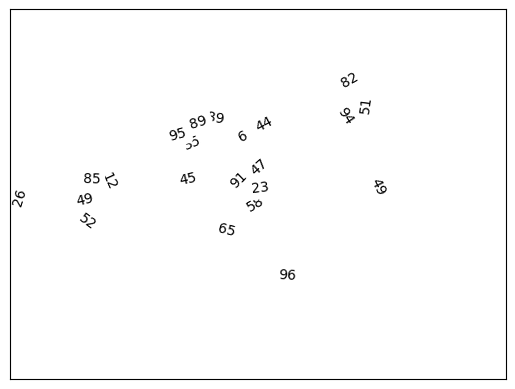

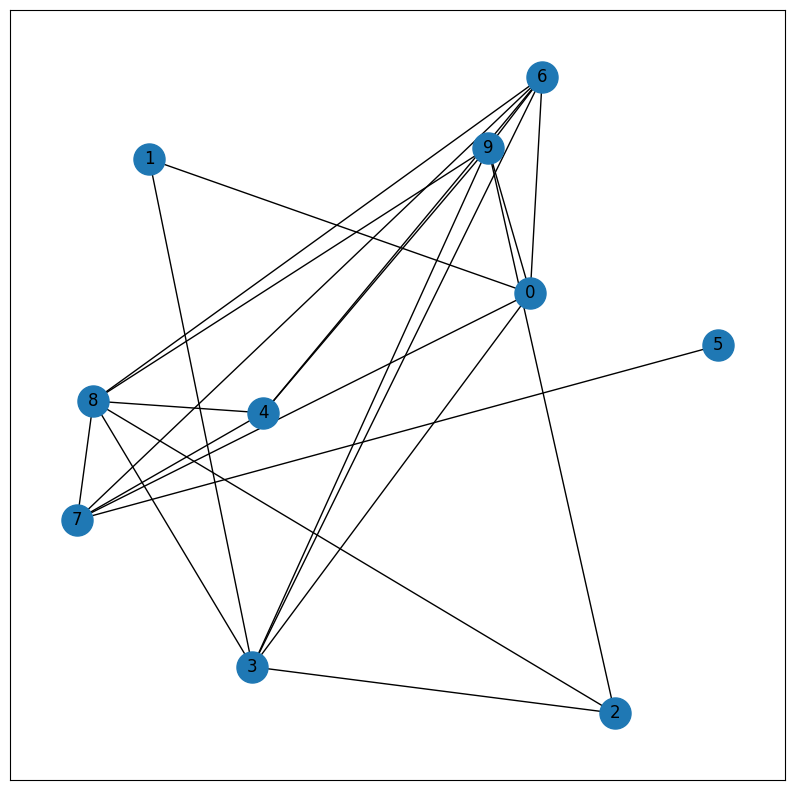

graph plotted in  197.5719928741455 ms


In [21]:
# Code pour créer l'instance
graph=Graph()
graph.generate_random_graph(10, 0.5)
graph.print_adjency_matrix()

##### Algorithme de colonies de fourmis


In [22]:
# Code de l'aco

In [23]:
# Code avec paramètres pour lancer l'aco

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
time 48.47550392150879 ms
best cost (565, ['0', '3', '1', '0', '7', '5', '7', '8', '2', '9', '4', '6', '7', '0'])
length 14


(565, ['0', '3', '1', '0', '7', '5', '7', '8', '2', '9', '4', '6', '7', '0'])

##### Algorithme du recuit simulé

In [24]:
# Code du recuit

In [25]:
# Code avec paramètres pour lancer le recuit

generation 1
crossover time : 0.006001710891723633 s
all mutation time : 0.0015106201171875 s
generation 2
crossover time : 0.005541324615478516 s
all mutation time : 0.0010006427764892578 s
generation 3
crossover time : 0.005012989044189453 s
all mutation time : 0.000990152359008789 s
generation 4
crossover time : 0.004013776779174805 s
all mutation time : 0.0020008087158203125 s
generation 5
crossover time : 0.00397038459777832 s
all mutation time : 0.0009996891021728516 s
generation 6
crossover time : 0.005544185638427734 s
all mutation time : 0.0009937286376953125 s
generation 7
crossover time : 0.0050144195556640625 s
all mutation time : 0.0010004043579101562 s
generation 8
crossover time : 0.006000518798828125 s
all mutation time : 0.0015118122100830078 s
generation 9
crossover time : 0.005952119827270508 s
all mutation time : 0.0013937950134277344 s
generation 10
crossover time : 0.006534576416015625 s
all mutation time : 0.0010006427764892578 s
generation 11
crossover time : 0.

(542, ['0', '7', '5', '7', '8', '6', '7', '4', '9', '2', '3', '1', '0'])

##### Algorithme génétique

In [ ]:
# Code du génétique

In [ ]:
# Code avec paramètres pour lancer le génétique